# section 1

## Q1to5

### questions

- for citation graph: is degree distribution similar to real world graphs( does it obey the power law? )

- for the karate club graph: does it have the small world property?


### expectations: 

- if the dataset is a social , I expect a power-law distribution: most nodes have few edges and a few nodes have very high degree (hubs).
If the network is more uniform ( sensor network or road network), I expect a more narrow and balanced distribution. (first one for these datasets ) it nswers the question do most nodes have few connections, or do many nodes have many connections?

- for social collaboration networks, I expect a high clustering coefficient because people or entities often form tightly knit communities. it shows if objects that is related to one object are related themselves or not?

- I expect the average path length to be low (small number of steps between nodes) if the network is real-world social or citation. it shows that with how many steps one object can get to another object? 

- for social networks, I expect positive assortativity: high-degree people connect with other high-degree people. higher values indicate that high degree nodes tend to connect to other high degree nodes, and lower (negative) values indicate that high degree nodes tend to connect to low degree nodes, and vice versa.

- for social or collaboration networks, I expect one large connected component with some small isolated components. it says that is all of are network somehow connected or not?


In [330]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random


In [143]:

import pandas as pd
import networkx as nx

def get_info_df(*graphs,names=None) -> pd.DataFrame:
    rows = []
    
    for i, G in enumerate(graphs, start=1):
        data = {}
        if(names is None):
            data["name"] = f"G{i}"
        else:
            data["name"]=names[i-1]

        data["nodes"] = G.number_of_nodes()
        data["edges"] = G.number_of_edges()

        if G.is_directed():
            data["strongly_cc"] = nx.number_strongly_connected_components(G)
            data["weakly_cc"] = nx.number_weakly_connected_components(G)
            largest_cc = max(nx.weakly_connected_components(G), key=len)
            data["largest_cc"] = len(largest_cc)
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            data["connected_components"] = nx.number_connected_components(G)
            data["largest_cc"] = len(largest_cc)
            
        data["avg_clustering"] = nx.average_clustering(G.to_undirected())
        data["avg_shortest_path"] = nx.average_shortest_path_length(G.subgraph(largest_cc).to_undirected())
        data["avg_degree"] = sum(dict(G.degree()).values()) / G.number_of_nodes()
        
        
        data["degree_assortativity"] = nx.degree_assortativity_coefficient(G)


        rows.append(data)

    return pd.DataFrame(rows)



def plot_degree_dist(*graphs: nx.classes.graph.Graph , log_log=True,names=None):
    for i, G in enumerate(graphs, start=1):
        
        degrees = [d for n, d in G.degree()]

        degree_counts = np.bincount(degrees)
        degree_values = np.arange(len(degree_counts))

        plt.figure()
        if(names is None):
            name=f"Graph{i}"
        else:
            name=names[i-1]
        if log_log:
            plt.loglog(degree_values[degree_counts > 0], degree_counts[degree_counts > 0], 'o')
            plt.title(f"{name} Degree Distribution (Log-Log Scale)")
        else:
            plt.plot(degree_values[degree_counts > 0], degree_counts[degree_counts > 0], 'o')
            plt.title(f"{name} Degree Distribution")

        plt.xlabel("Degree (k)")
        plt.ylabel("Number of Nodes with Degree k")
        plt.show()

def plot_graph(*graphs: nx.classes.graph.Graph,names=None,** kwargs):
    for i, G in enumerate(graphs, start=1):
        if(names is None):
            name=f"Graph{i}"
        else:
            name=names[i-1]
        print(G)
        plt.figure(figsize=(12, 10))
        plt.title(name)
        nx.draw(G, with_labels=True,**kwargs)
        plt.show()

def plot_connected_components(G: nx.classes.graph.Graph):
    
    sizes = [len(c) for c in  (  nx.weakly_connected_components(G) if G.is_directed() else nx.connected_components(G))]
    unique_sizes = sorted(set(sizes))
    bins = np.arange(min(unique_sizes), max(unique_sizes) + 2) - 0.5

    plt.figure(figsize=(6, 4))
    plt.hist(sizes, bins=bins, edgecolor='black')
    plt.xticks(unique_sizes)  # Show only integer sizes on x-axis
    plt.xlabel("Component Size (number of nodes)")
    plt.ylabel("Frequency")
    plt.title("Connected Component Size Distribution")
    plt.tight_layout()
    plt.show()

    print("Number of CCs:", len(sizes))
    print("Sizes:", sorted(sizes, reverse=True))




  name  nodes  edges  strongly_cc  weakly_cc  largest_cc  avg_clustering  avg_shortest_path  avg_degree  degree_assortativity
0   G1   2708   5429         2526         78        2485        0.240673           6.310999    4.009601             -0.035417


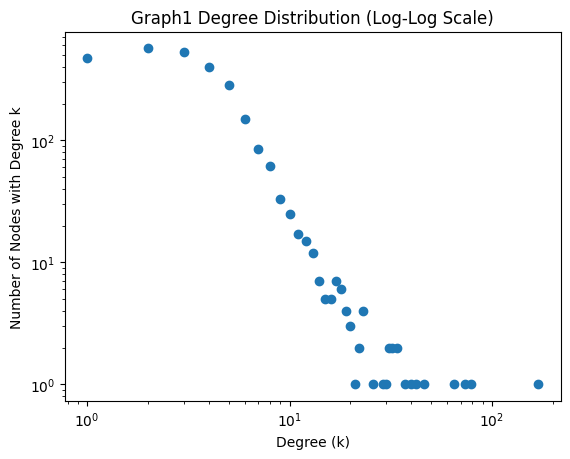

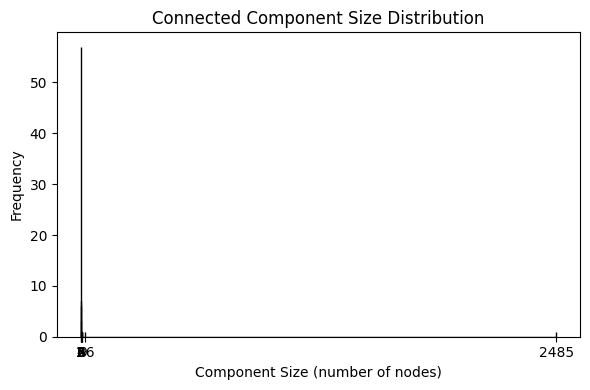

Number of CCs: 78
Sizes: [2485, 26, 9, 8, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [136]:


cite_graph= nx.read_edgelist('../../../Data Sets/Basic/Cora Citation Network/cora.cites', delimiter='\t', 
                     create_using=nx.DiGraph(),  # Citations are directional
                     nodetype=int)

print(get_info_df(cite_graph).to_string())

plot_degree_dist(cite_graph)

plot_connected_components(cite_graph)


- as we can see at first number of nodes for each degree decrease approximately linearly(on the log-log plot ) straight line trend on a log-log scale indicates a power-law distribution . so the answer is yes.


as we can see expectations for clustering coefficient and degree distribution and lcc and average shortest path is fulfiled but as the assortiativity my expectation was wrong. it is because less important papers have citations to important papers and nx by default considers the graph undeirected for calculating this parameter.



  name  nodes  edges  connected_components  largest_cc  avg_clustering  avg_shortest_path  avg_degree  degree_assortativity
0   G1     34     78                     1          34        0.570638             2.4082    4.588235             -0.475613
Graph with 34 nodes and 78 edges


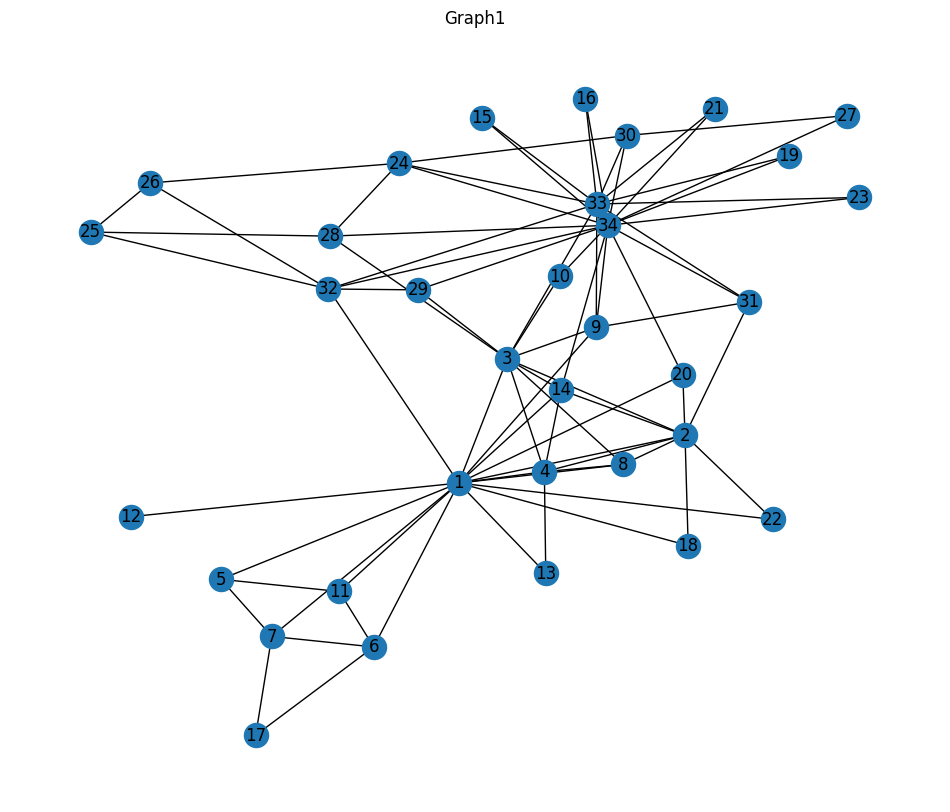

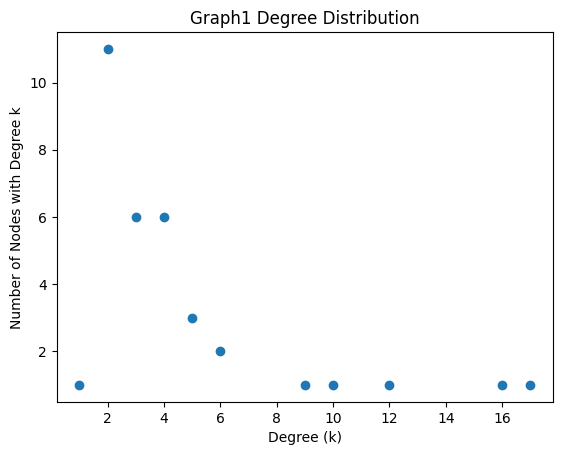

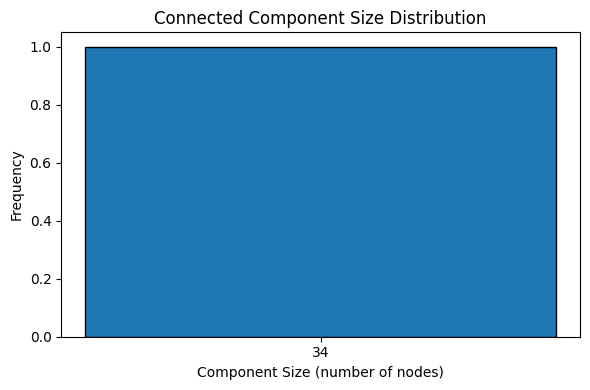

Number of CCs: 1
Sizes: [34]


In [144]:
cite_graph= nx.read_edgelist('../../../Data Sets/Basic/Cora Citation Network/cora.cites', delimiter='\t', 
                     create_using=nx.DiGraph(),  # Citations are directional
                     nodetype=int)
karate = nx.read_gml('../../../Data Sets/Basic/Zachary\'s karate club/karate.gml')
print(get_info_df(karate).to_string())
plot_graph(karate)
plot_degree_dist(karate,log_log=False)
plot_connected_components(karate)

The average shortest path length of the network is **2.4**, which indicates that the graph exhibits the small-world property.(clustering coeeficient is extremely high too)

 Small-World Property

A network is considered *small-world* if it satisfies both of the following:

- **High clustering coefficient** – nodes tend to form tightly connected groups, where the neighbors of a node are also connected to each other.
- **Small average shortest path length** – most nodes can be reached from any other node in only a few steps, typically scaling as O(log(n))



again, almost all expectations were correct except for the assortativity. I initially expected a positive assortativity . in other words, this network does not exhibit the same behavior as social media networks with celebrities or influencers and there are no high-degree stars here, and most students are similarly connected to each other.

# section 2

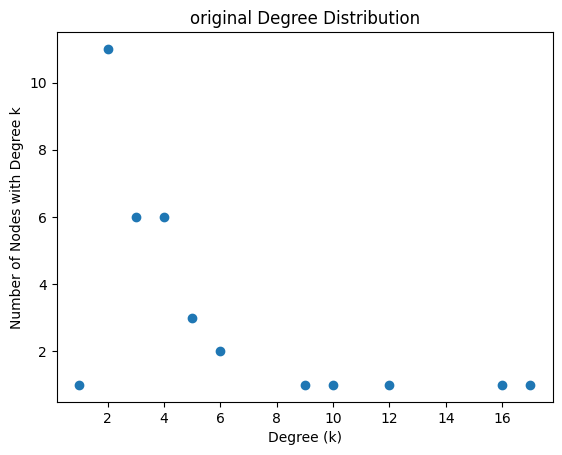

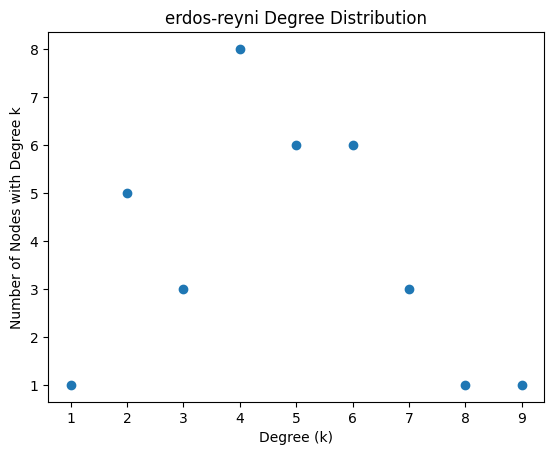

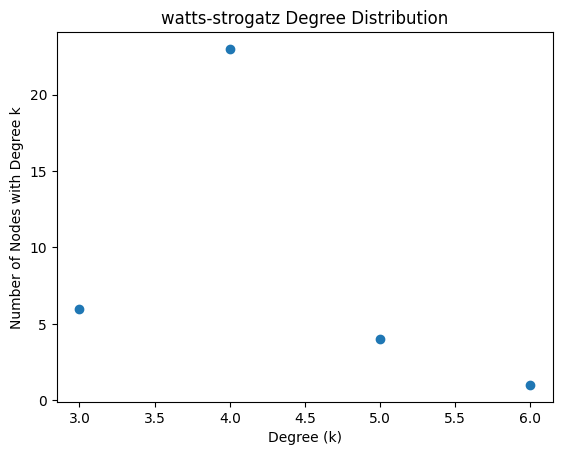

Graph with 34 nodes and 78 edges


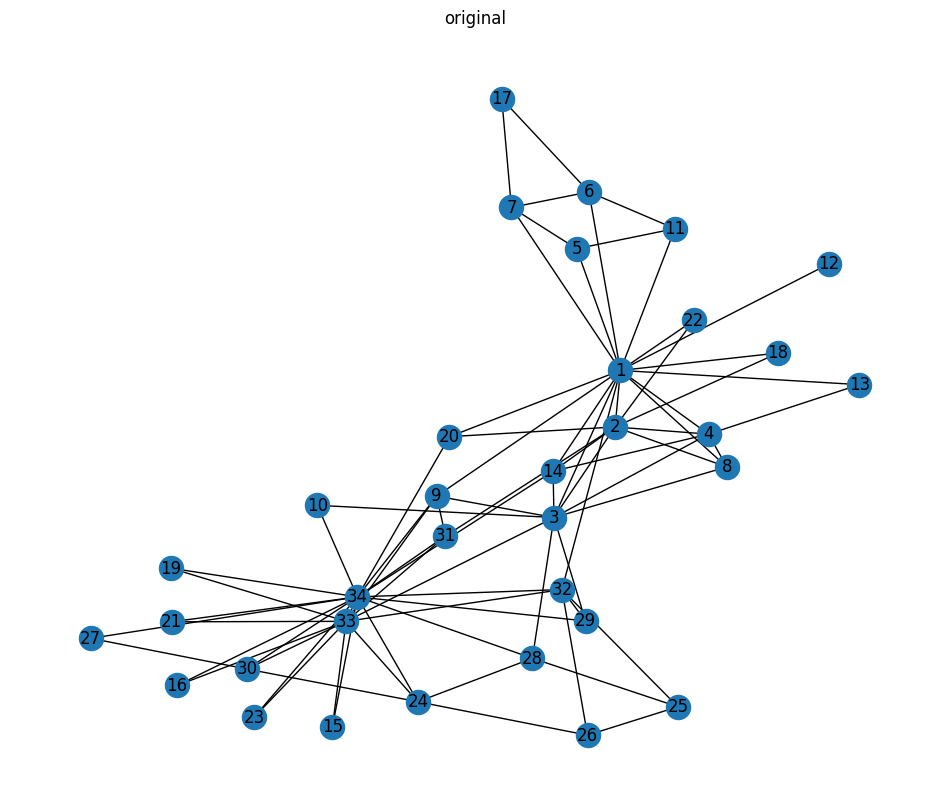

Graph with 34 nodes and 78 edges


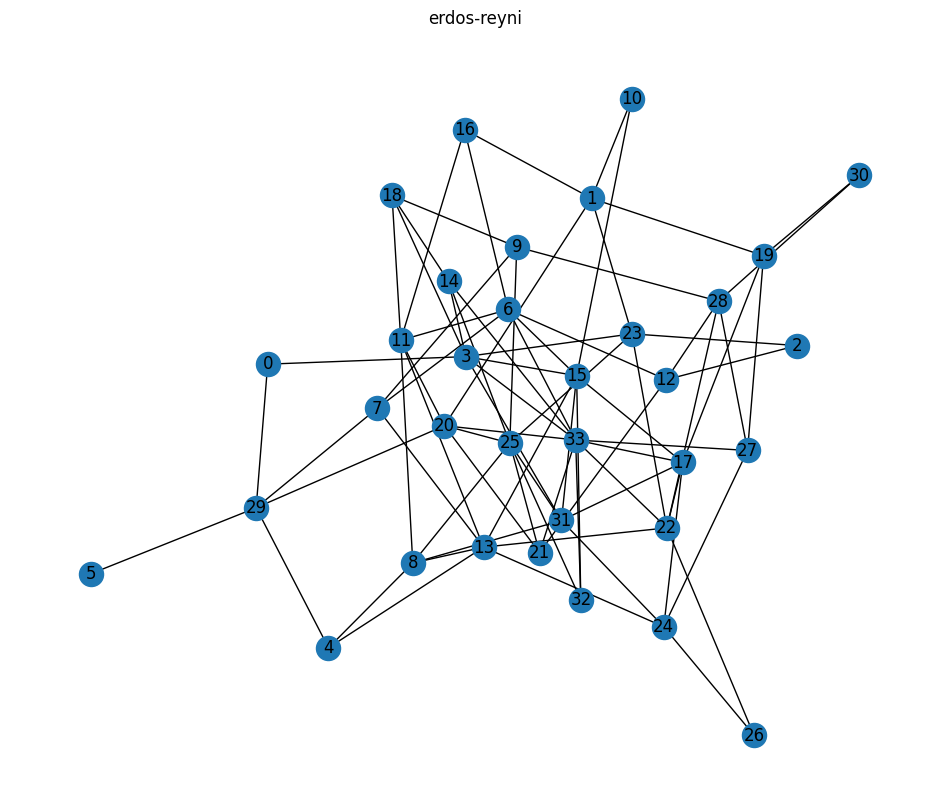

Graph with 34 nodes and 68 edges


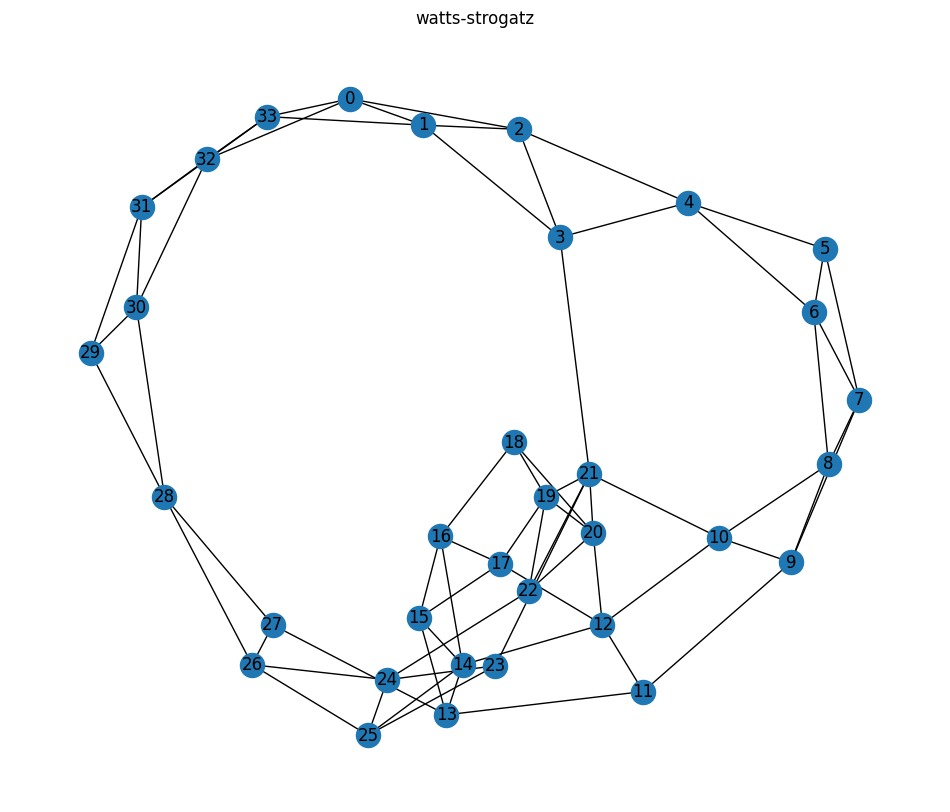

,name,nodes,edges,connected_components,largest_cc,avg_clustering,avg_shortest_path,avg_degree,degree_assortativity
0,original,34,78,1,34,0.570638,2.408200,4.588235,-0.475613
1,erdos-reyni,34,78,1,34,0.095728,2.393939,4.588235,-0.070612
2,watts-strogatz,34,68,1,34,0.373529,3.336898,4.000000,0.042254


In [ ]:
import networkx as nx
import math



def generate_ws(n, m, rewiring_prob=0.1):
   
    
    k =int(round((2 * m) / n))
    # if k % 2 == 1:  
    #     k += 1 

    G_ws = nx.watts_strogatz_graph(n, k, rewiring_prob)
    return  G_ws





G_er = nx.gnm_random_graph(karate.number_of_nodes(), karate.number_of_edges())
G_wr=generate_ws(karate.number_of_nodes(), karate.number_of_edges())


plot_degree_dist(karate,G_er,G_wr,names=["original","erdos-reyni","watts-strogatz"],log_log=False)

plot_graph(karate,G_er,G_wr,names=["original","erdos-renyi","watts-strogatz"])
get_info_df(karate,G_er,G_wr,names=["original","erdos-reyni","watts-strogatz"])

first it is worth mensioning that because the network is small I ran simulagtions many time and the average result was some thing like this:

and the simulation is for rewriting prob of 0.1. it can be diffrent for watts-strogatz for other probs.

1. Degree Distribution

    Karate Club: skewed distribution. A few nodes have high degrees (hubs), most nodes have low degrees networks.

    Erdős–Rényi: approximately normal distribution. Most nodes have degree near the average, very few high-degree nodes 

    Watts–Strogatz: degree distribution is narrow, bell-shaped, close to the average degree. Almost all nodes have degree near 
    k
    k, with a few variations due to rewiring 

2. Average Shortest Path

    Karate Club: small average shortest path.most nodes reachable in few steps.

    Erdős–Rényi: also small.random edges create shortcuts.

    Watts–Strogatz: also small but longer because a good rewrite probability is not chosen. in the next part we will choose a better one. but still the avg shortest path is a little more than what it should be it can be because number of edges can not match excaly and for small grpahs it will matter

3. Average Clustering Coefficient

    Karate Club: high strong community structure. neighbors of a node are often connected.

    Erdős–Rényi: low . random connections rarely form triangles.

    Watts–Strogatz: high. retains the clustering of the initial lattice even after some rewiring. captures the small-world effect.



Graph with 34 nodes and 78 edges


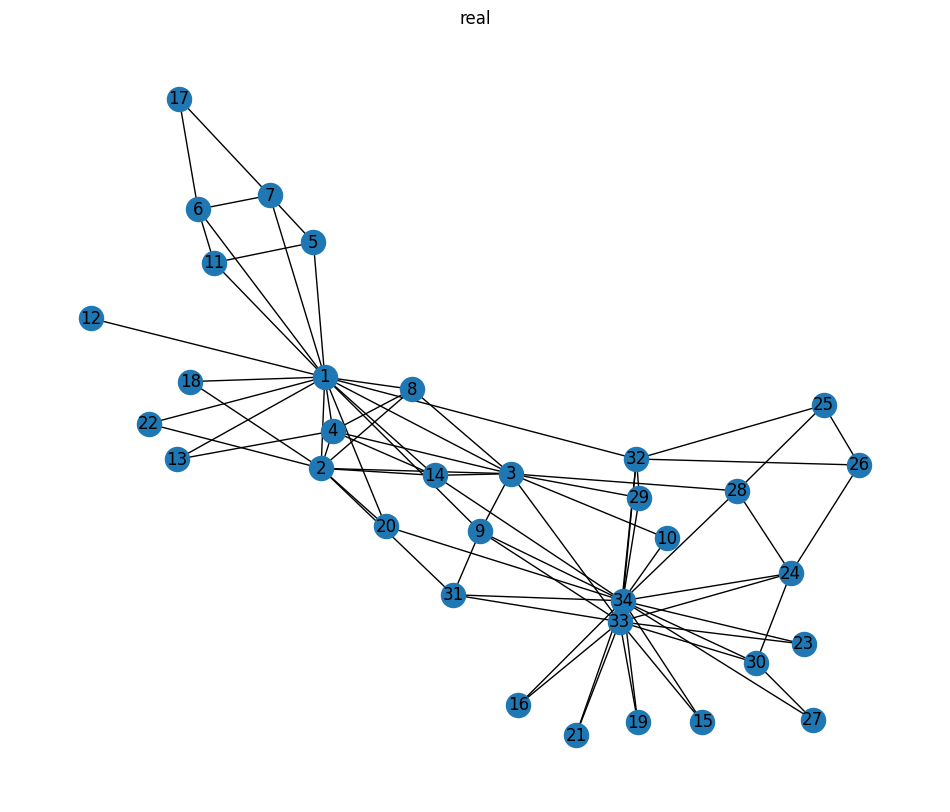

Graph with 34 nodes and 71 edges


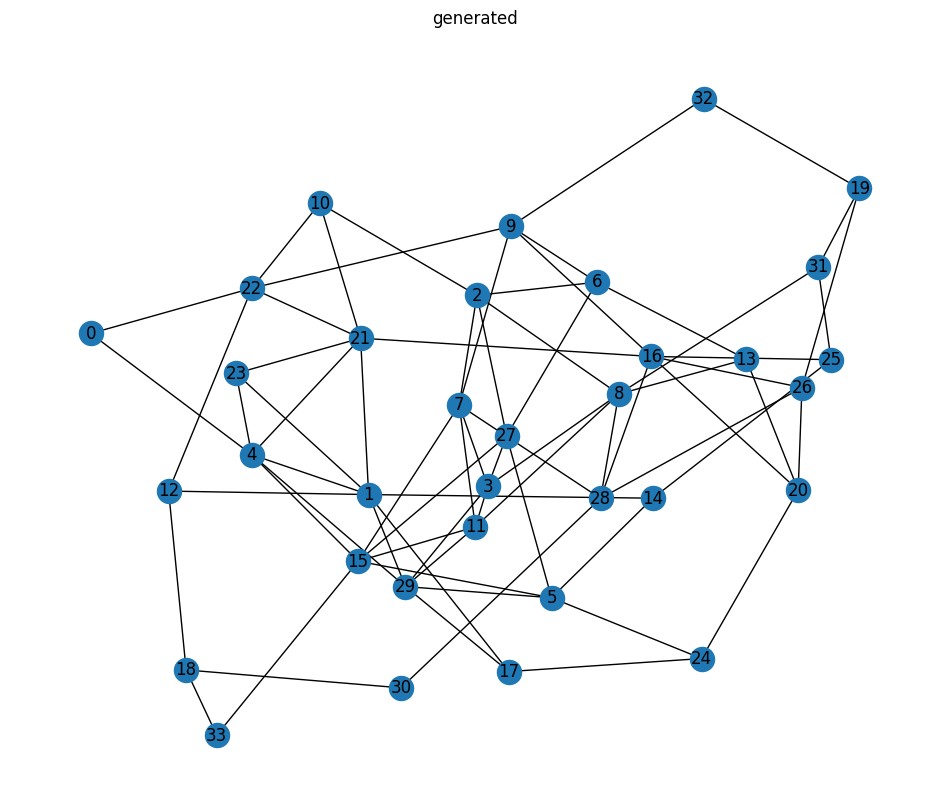

In [238]:
n = karate.number_of_nodes()

best_graph = None
best_score = float('inf')
real_clustering = nx.average_clustering(karate)
real_path = nx.average_shortest_path_length(karate)
p_values = np.linspace(0, 1, 71)  
norm_cluster = max(real_clustering, 1e-5)  
norm_path = max(real_path, 1e-5)
for p in p_values:
    G_er = nx.erdos_renyi_graph(karate.number_of_nodes(),p)
    score = 0.0
    
    score += abs(nx.average_clustering(G_er) - real_clustering) / norm_cluster
    try:
        score += abs(nx.average_shortest_path_length(G_er) - real_path) / norm_path
    except:
        score += float('inf')
    if score < best_score:
        best_score = score
        best_graph = G_er
        best_p = p


# print(f"best p: {best_p}")
# plot_graph(best_graph)

#this results in a bad graph usuaully almost complete graph because 
# for random graphs it is hard to get high clustering coefficient 

#so by trying by myself I go the value of 
# that at least looks like the real graph

plot_graph(karate,nx.erdos_renyi_graph(karate.number_of_nodes(),0.13),names=["real","generated"])


best p: 0.21428571428571427
Graph with 34 nodes and 68 edges


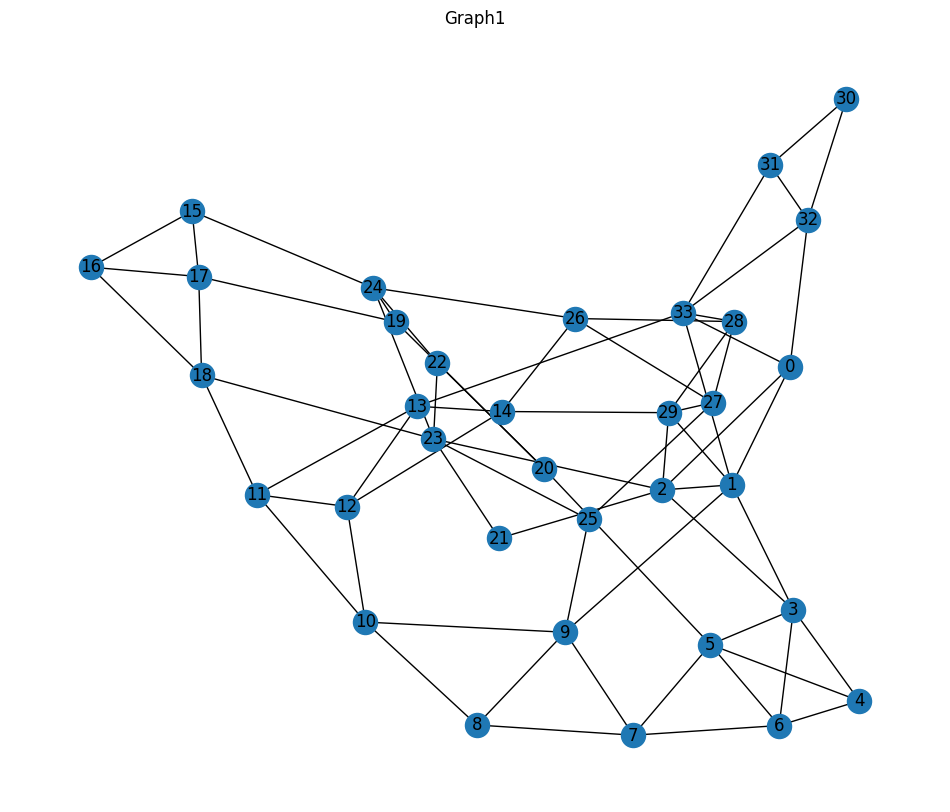

,name,nodes,edges,connected_components,largest_cc,avg_clustering,avg_shortest_path,avg_degree,degree_assortativity
0,G1,34,78,1,34,0.570638,2.408200,4.588235,-0.475613
1,G2,34,68,1,34,0.377451,2.909091,4.000000,0.035091


In [ ]:
n = karate.number_of_nodes()

best_graph = None
best_score = float('inf')
real_clustering = nx.average_clustering(karate)
real_path = nx.average_shortest_path_length(karate)
p_values = np.linspace(0, 1, 71)  
norm_cluster = max(real_clustering, 1e-5)  
norm_path = max(real_path, 1e-5)
for p in p_values:
    G_ws = generate_ws(n, karate.number_of_edges(), p)
    score = 0.0
    
    score += abs(nx.average_clustering(G_ws) - real_clustering) / norm_cluster
    try:
        score += abs(nx.average_shortest_path_length(G_ws) - real_path) / norm_path
    except:
        score+=float('inf')
        
    if score < best_score:
        best_score = score
        best_graph = G_ws
        best_p = p

print(f"best p: {best_p}")
plot_graph(best_graph)

get_info_df(karate,best_graph)


In [251]:
get_info_df(karate,generate_ws(n, karate.number_of_edges(), 0.0001))


,name,nodes,edges,connected_components,largest_cc,avg_clustering,avg_shortest_path,avg_degree,degree_assortativity
0,G1,34,78,1,34,0.570638,2.408200,4.588235,-0.475613
1,G2,34,68,1,34,0.500000,4.636364,4.000000,NaN


I have a for loop that test diffrent values for bith graphs 
and compares the normalized diffrence betwean measures to see whitch is better
for the random graph the resulting grpah is not so good because of the reason explained above.
as for the watts-strog the because the karateh club graphs clustering coefficient is evry high and even with setting p=0 we cant get that clustering coef gretaer that 0.5  it can be somehow misleading but if the sample was bigger the result would have been better. it is possible to get better results by rounding the number of neighbors up instead of down. 

for the random graph the probability can be near 2(e)/((n-1)*n)


we could also use binary search or ternery search to find the optimal answer
or even genetic and local search techniques






the Watts–Strogatz  model is generally better suited for modeling real-world networks than the Erdos–Renyi  model because it can capture two key features commonly observed in real networks: high clustering and short average path length. while ER networks are entirely random and tend to have low clustering, WS networks start from a regular lattice and introduce a small fraction of random rewiring, creating “shortcuts” that reduce path lengths while preserving local clustering. this combination of “small-world” properties—high clustering like social networks and short paths like transportation or communication networks—makes WS a more realistic approximation of many natural and technological systems, whereas ER networks, with their uniform randomness, fail to reproduce these structural nuances

# section 3

In [373]:


def kleinberg(m, q=1, r=2):
    G = nx.Graph()
    
    nodes = [(i,j) for i in range(m) for j in range(m)]
    G.add_nodes_from(nodes)
    
    for i, j in nodes:
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]: #,(1,1),(-1,-1),(-1,1),(1,-1)]:
            ni, nj = i + dx, j + dy
            if 0 <= ni < m and 0 <= nj < m:
                G.add_edge((i,j), (ni,nj))
    
    node_array = np.array(nodes)
    for u in nodes:
        distances = np.abs(node_array[:,0] - u[0]) + np.abs(node_array[:,1] - u[1])
        distances = distances.astype(float)
        distances[distances==0] = np.inf  
        probs = distances**(-r)
        probs[probs==np.inf] = 0
        probs /= probs.sum()
        
        targets = np.random.choice(len(nodes), size=q, replace=False, p=probs)
        for t in targets:
            v = nodes[t]
            if not G.has_edge(u, v):
                G.add_edge(u, v)
    
    return G

def plot_kleinberg(G):
    m=int(math.sqrt( G.number_of_nodes()))
    pos = { (i,j):(j,-i) for i in range(m) for j in range(m) }
    plt.figure(figsize=(8,8))
    nx.draw(G, pos, node_size=20, with_labels=False, edge_color='gray')
    plt.title("Fast Handmade Kleinberg Graph")
    plt.show()




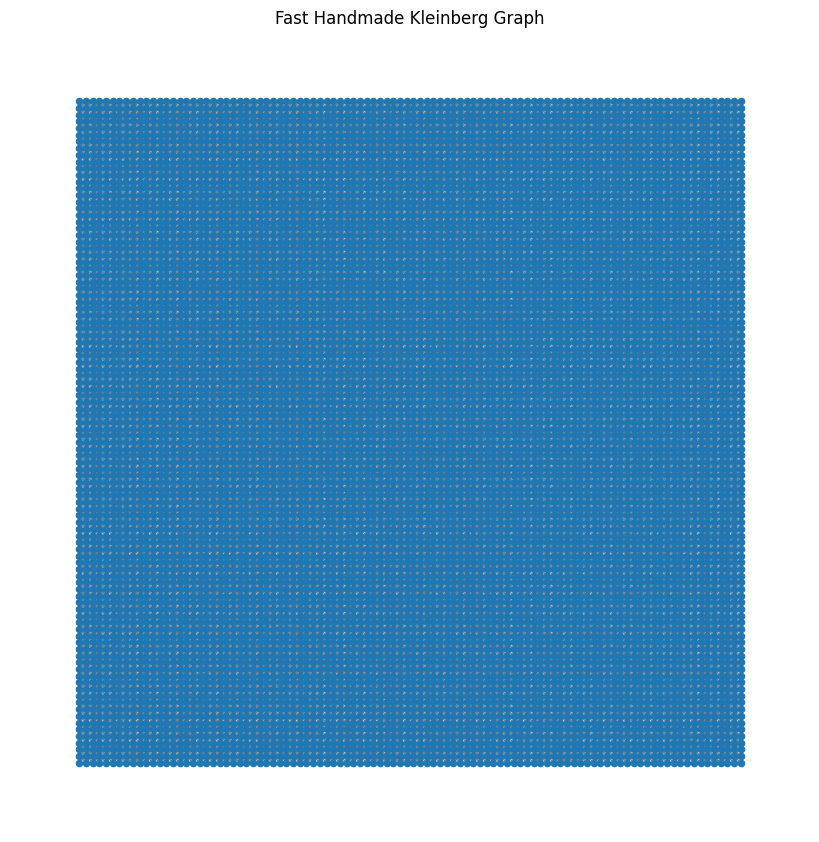

In [369]:

graphs=[kleinberg(m=100, q=2, r=i) for i in range(1,4)]
plot_kleinberg(graphs[2])


In [380]:
def greedy_local_search(G, start, goal, heuristic):
    current = start
    path = [current]
    
    while current != goal:
        neighbors = [n for n in G.neighbors(current) ]
        if not neighbors:
            return path,False
        
        current = min(neighbors, key=lambda x: heuristic(x,goal))
        path.append(current)
    
    return path,True

def manhattan_distance(node,goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])


In [375]:

graph = kleinberg(m=100, q=2, r=2)

path,success = greedy_local_search(graph, (0,0), (99,99), manhattan_distance)
print(success,path)

True [(0, 0), (9, 3), (70, 6), (71, 6), (72, 6), (71, 14), (75, 14), (76, 14), (90, 28), (91, 37), (92, 37), (93, 37), (96, 41), (97, 49), (97, 60), (98, 60), (99, 60), (99, 61), (99, 62), (99, 63), (97, 73), (98, 80), (99, 80), (99, 81), (99, 82), (99, 86), (99, 87), (99, 88), (99, 89), (99, 90), (99, 91), (99, 92), (99, 97), (99, 98), (99, 99)]


In [393]:
dim=100
num_trials = 100
for i in range(6):
    print(f"r={i}")
    steps_list = []
    success_count = 0
    time_list = []

    graph = kleinberg(m=dim, q=4, r=i)
    for _ in range(num_trials):
        start=(random.randint(0,dim-1),random.randint(0,dim-1))
        # goal=(random.randint(0,dim-1),random.randint(0,dim-1))
        goal=(0,0)
        t0 = time.time()
        path, success = greedy_local_search(graph, start, goal, manhattan_distance)
        t1 = time.time()
        
        steps_list.append(len(path))
        time_list.append(t1 - t0)
        if success:
            success_count += 1

    # Statistics
    average_steps = np.mean(steps_list)
    success_rate = success_count / num_trials * 100
    average_time = np.mean(time_list)

    print(f"Average number of steps: {average_steps:.2f}")
    print(f"Success rate: {success_rate:.2f}%")
    print(f"Average search time: {average_time*1000:.3f} ms")


r=0
Average number of steps: 16.78
Success rate: 100.00%
Average search time: 0.026 ms
r=1
Average number of steps: 14.05
Success rate: 100.00%
Average search time: 0.024 ms
r=2
Average number of steps: 11.81
Success rate: 100.00%
Average search time: 0.018 ms
r=3
Average number of steps: 26.89
Success rate: 100.00%
Average search time: 0.036 ms
r=4
Average number of steps: 56.90
Success rate: 100.00%
Average search time: 0.060 ms
r=5
Average number of steps: 72.02
Success rate: 100.00%
Average search time: 0.071 ms


kleinberg stated that consider a 2D grid in which everyone is at first just connected to their neighbors 
then add q edges to every node and the destination of the edge is selected with a probability proportional to its distance to 
the src. he said that this network will be searchable and can be searched in O(log(n)*log(n)) and the optimal power is -2 
for 2D grid which we can see is standing according to the result.( though I had to adjust q to get the best result. in most cases r=1 and r=2
were very close )

it says that for r<2 edges are too random and for r>2 edges are too local

# section 4

problem is finding shortest path between the most ranked paper based on page rank and others


In [ ]:

def limited_bfs(graph, start, goal, max_depth):
    queue = [(start, 0)]
    visited = set()

    while queue:
        node, depth = queue.pop(0)
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            return True, visited
        if depth < max_depth:
            for neighbor in graph.neighbors(node):
                queue.append((neighbor, depth + 1))
    return False, visited



Paper with highest PageRank: 683355, score: 0.00452


AtlasView({1033: {}, 103482: {}, 103515: {}, 1050679: {}, 1103960: {}, 1103985: {}, 1109199: {}, 1112911: {}, 1113438: {}, 1113831: {}, 1114331: {}, 1117476: {}, 1119505: {}, 1119708: {}, 1120431: {}, 1123756: {}, 1125386: {}, 1127430: {}, 1127913: {}, 1128204: {}, 1128227: {}, 1128314: {}, 1128453: {}, 1128945: {}, 1128959: {}, 1128985: {}, 1129018: {}, 1129027: {}, 1129573: {}, 1129683: {}, 1129778: {}, 1130847: {}, 1130856: {}, 1131116: {}, 1131360: {}, 1131557: {}, 1131752: {}, 1133196: {}, 1133338: {}, 1136814: {}, 1137466: {}, 1152421: {}, 1152508: {}, 1153065: {}, 1153280: {}, 1153577: {}, 1153853: {}, 1153943: {}, 1154176: {}, 1154459: {}, 116552: {}, 12576: {}, 128540: {}, 132806: {}, 135130: {}, 141342: {}, 141347: {}, 148170: {}, 15670: {}, 1688: {}, 175291: {}, 178727: {}, 18582: {}, 190697: {}, 190706: {}, 1956: {}, 197054: {}, 198443: {}, 198653: {}, 206371: {}, 210871: {}, 229635: {}, 231249: {}, 248425: {}, 249421: {}, 254923: {}, 259701: {}, 259702: {}, 263279: {}, 263

In [407]:

cite_graph= nx.read_edgelist('../../../Data Sets/Basic/Cora Citation Network/cora.cites', delimiter='\t', 
                     create_using=nx.DiGraph(),  
                     nodetype=int)


pagerank_scores = nx.pagerank(cite_graph, alpha=0.85)

top_paper = max(pagerank_scores.items(), key=lambda x: x[1])
print(f"Paper with highest PageRank: {top_paper[0]}, score: {top_paper[1]:.5f}")

target,rank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[0]


Paper with highest PageRank: 683355, score: 0.00452


Number of nodes that can reach the target: 88


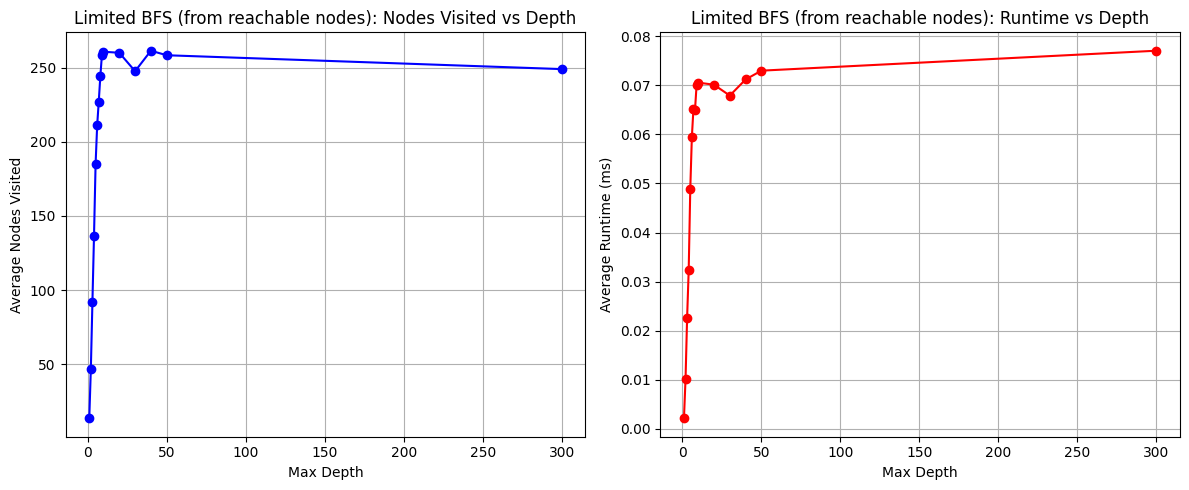

Depth 1: Success Rate = 6.8%
Depth 2: Success Rate = 15.6%
Depth 3: Success Rate = 25.5%
Depth 4: Success Rate = 32.9%
Depth 5: Success Rate = 47.0%
Depth 6: Success Rate = 62.8%
Depth 7: Success Rate = 73.1%
Depth 8: Success Rate = 82.5%
Depth 9: Success Rate = 86.2%
Depth 10: Success Rate = 90.3%
Depth 20: Success Rate = 100.0%
Depth 30: Success Rate = 100.0%
Depth 40: Success Rate = 100.0%
Depth 50: Success Rate = 100.0%
Depth 300: Success Rate = 100.0%


In [434]:
reverse_graph = cite_graph.reverse(copy=False)
reachable_nodes = nx.descendants(reverse_graph, target)
reachable_nodes.add(target)  # include the target itself
print(f"Number of nodes that can reach the target: {len(reachable_nodes)}")

depths = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,300]
num_trials = 1000

avg_nodes_visited = []
avg_runtime_ms = []
success_rate = []

for depth in depths:
    nodes_visited_list = []
    runtime_list = []
    success_count = 0
    
    for _ in range(num_trials):
        start_node = random.choice(list(reachable_nodes))
        t0 = time.time()
        found, visited = limited_bfs(cite_graph, start_node, target, max_depth=depth)
        t1 = time.time()
        
        nodes_visited_list.append(len(visited))
        runtime_list.append((t1 - t0) * 1000)
        if found:
            success_count += 1
    
    avg_nodes_visited.append(sum(nodes_visited_list)/num_trials)
    avg_runtime_ms.append(sum(runtime_list)/num_trials)
    success_rate.append(success_count / num_trials * 100)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(depths, avg_nodes_visited, marker='o', color='blue')
plt.xlabel("Max Depth")
plt.ylabel("Average Nodes Visited")
plt.title("Limited BFS (from reachable nodes): Nodes Visited vs Depth")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(depths, avg_runtime_ms, marker='o', color='red')
plt.xlabel("Max Depth")
plt.ylabel("Average Runtime (ms)")
plt.title("Limited BFS (from reachable nodes): Runtime vs Depth")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print success rate
for d, s in zip(depths, success_rate):
    print(f"Depth {d}: Success Rate = {s:.1f}%")

first I considered the directed graph and at first runtime have exponential relation with how much we go deep but after a certain number of nodes visited and runtime stays the same mostly because we can see all the nodes that we can reac in approximately 10 moves
then I will make the graph undeirected to see what happens

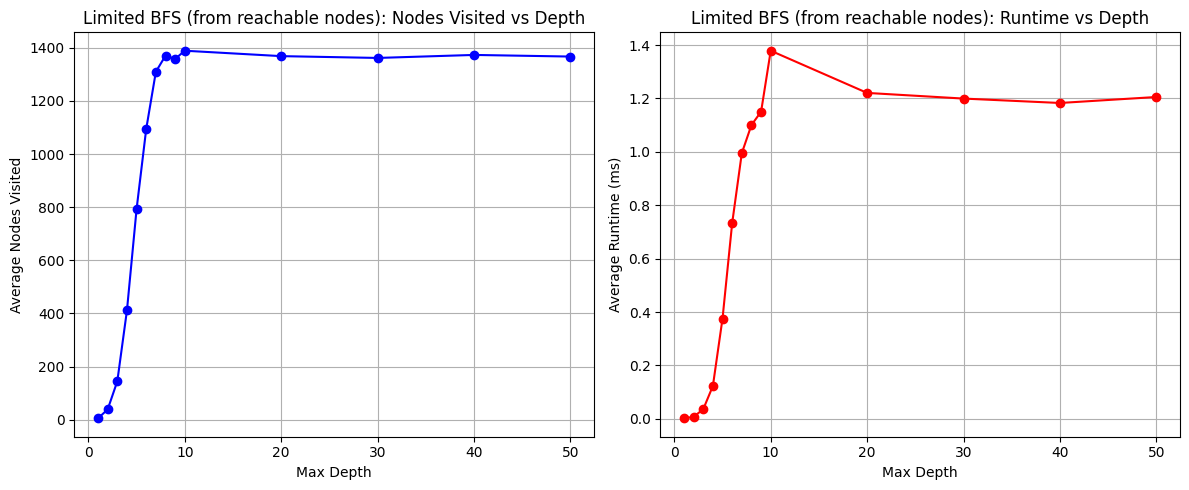

Depth 1: Success Rate = 0.2%
Depth 2: Success Rate = 1.1%
Depth 3: Success Rate = 2.3%
Depth 4: Success Rate = 8.4%
Depth 5: Success Rate = 22.2%
Depth 6: Success Rate = 55.2%
Depth 7: Success Rate = 79.5%
Depth 8: Success Rate = 93.7%
Depth 9: Success Rate = 97.8%
Depth 10: Success Rate = 99.8%
Depth 20: Success Rate = 100.0%
Depth 30: Success Rate = 100.0%
Depth 40: Success Rate = 100.0%
Depth 50: Success Rate = 100.0%
2485


In [ ]:

undirected_cite_graph = cite_graph.to_undirected().copy()

connected_components = list(nx.connected_components(undirected_cite_graph))

largest_cc_nodes = max(connected_components, key=len)

#just consider the largest connected component
main_graph = undirected_cite_graph.subgraph(largest_cc_nodes).copy()

assert(target in main_graph.nodes())

depths = [1,2,3,4,5,6,7,8,9,10,20,30,40,50]
num_trials = 1000

avg_nodes_visited = []
avg_runtime_ms = []
success_rate = []

for depth in depths:
    nodes_visited_list = []
    runtime_list = []
    success_count = 0
    
    for _ in range(num_trials):
        start_node = random.choice(list(main_graph.nodes))
        t0 = time.time()
        found, visited = limited_bfs(main_graph, start_node, target, max_depth=depth)
        t1 = time.time()
        
        nodes_visited_list.append(len(visited))
        runtime_list.append((t1 - t0) * 1000)
        if found:
            success_count += 1

    avg_nodes_visited.append(sum(nodes_visited_list)/num_trials)
    avg_runtime_ms.append(sum(runtime_list)/num_trials)
    success_rate.append(success_count / num_trials * 100)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(depths, avg_nodes_visited, marker='o', color='blue')
plt.xlabel("Max Depth")
plt.ylabel("Average Nodes Visited")
plt.title("Limited BFS (from reachable nodes): Nodes Visited vs Depth")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(depths, avg_runtime_ms, marker='o', color='red')
plt.xlabel("Max Depth")
plt.ylabel("Average Runtime (ms)")
plt.title("Limited BFS (from reachable nodes): Runtime vs Depth")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print success rate
for d, s in zip(depths, success_rate):
    print(f"Depth {d}: Success Rate = {s:.1f}%")



it seems that the effect is there even for undirected graph and we can reach target almost from every where by ten moves

the networks small world property means that most nodes are reachable from any other node in a relatively small number of steps.
dense connectivity and the presence of influential hubs (high page rank nodes) reduce the effective search depth required.

limited BFS performs efficiently in this context: although early growth in runtime is steep, it quickly saturates as the reachable portion of the network is explored.

This demonstrates that search complexity is closely linked to network topology: high connectivity, small-world paths, and hub nodes allow local search algorithms to find targets efficiently, even in large networks. 

In a random or poorly connected network, limited BFS might fail often or need much larger depth.
In a small-world network with hubs, limited BFS finds targets reliably and quickly.
